In [90]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

In [91]:
df = pd.read_excel("Final_Dataset.xlsx")
data = pd.read_excel("Final_Dataset.xlsx")

In [92]:
#handling the missing values in gender column
mode_gender = data['gender'].mode().iloc[0]
data['gender'].fillna(mode_gender, inplace=True)
data

,msno,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,...,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,is_churn
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,male,7,20110914,41,30,129,129,...,0,20170325,4,2,0,1,16,20,4105.797,0
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916,39,30,149,149,...,0,20170329,0,1,1,2,100,12,24191.356,0
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918,40,30,149,149,...,0,20170329,0,0,0,0,24,19,6251.930,0
3,GqYHRxlZChiZvB1uzR410wcQzuxqZNZci4AzOTzkAao=,5,27,male,9,20110927,39,30,149,149,...,0,20170316,7,3,1,1,46,48,11125.928,0
4,den0Kb2s4BV47zV+tSC1u0W07M7BOMq+fnrGj+9ax0I=,14,26,female,9,20111005,37,30,149,149,...,0,20170315,1,0,0,0,11,11,2835.853,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59825,J4COE1wdRTRnubYX56ueiEzT+2O8ZP3oVbb+pOWWPNY=,6,22,male,3,20170126,36,30,180,180,...,0,20170301,1,0,0,0,3,4,810.631,0
59826,5KyaJzoa/4IbtFMwg54YelWVilmJsEQQ1a/w9DmrLRc=,1,0,male,7,20170128,41,30,100,100,...,0,20170304,1,0,0,2,1,3,663.445,0
59827,ZRFBmoX2UL9AjkkvbNxF5Z1zTKo8bcKHMJdoUCrPd8Y=,1,0,male,4,20170130,36,30,180,180,...,1,20170326,2,1,0,0,8,9,2124.755,0
59828,lAaFSuOydRI/DDJP9bYIDDNo8BdxOsrTVpg1w63zFHM=,1,0,male,7,20170131,41,30,100,100,...,0,20170319,3,0,2,1,42,30,10295.092,0


In [93]:
date_columns = ['registration_init_time', 'transaction_date', 'membership_expire_date', 'date']

for col in date_columns:
    if data[col].dtype != 'datetime64[ns]':
        data[col] = pd.to_datetime(data[col], format='%Y%m%d')
print(data[['registration_init_time', 'transaction_date', 'membership_expire_date', 'date']].dtypes)

registration_init_time    datetime64[ns]
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
date                      datetime64[ns]
dtype: object


In [94]:
data['days_since_registration'] = (data['transaction_date'] - data['registration_init_time']).dt.days
data['days_to_membership_expiry'] = (data['membership_expire_date'] - data['transaction_date']).dt.days


In [95]:
data

,msno,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,...,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,is_churn,days_since_registration,days_to_membership_expiry
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,male,7,2011-09-14,41,30,129,129,...,4,2,0,1,16,20,4105.797,0,2021,32
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2011-09-16,39,30,149,149,...,0,1,1,2,100,12,24191.356,0,2023,47
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,2011-09-18,40,30,149,149,...,0,0,0,0,24,19,6251.930,0,2017,30
3,GqYHRxlZChiZvB1uzR410wcQzuxqZNZci4AzOTzkAao=,5,27,male,9,2011-09-27,39,30,149,149,...,7,3,1,1,46,48,11125.928,0,1981,62
4,den0Kb2s4BV47zV+tSC1u0W07M7BOMq+fnrGj+9ax0I=,14,26,female,9,2011-10-05,37,30,149,149,...,1,0,0,0,11,11,2835.853,0,1977,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59825,J4COE1wdRTRnubYX56ueiEzT+2O8ZP3oVbb+pOWWPNY=,6,22,male,3,2017-01-26,36,30,180,180,...,1,0,0,0,3,4,810.631,0,59,34
59826,5KyaJzoa/4IbtFMwg54YelWVilmJsEQQ1a/w9DmrLRc=,1,0,male,7,2017-01-28,41,30,100,100,...,1,0,0,2,1,3,663.445,0,58,31
59827,ZRFBmoX2UL9AjkkvbNxF5Z1zTKo8bcKHMJdoUCrPd8Y=,1,0,male,4,2017-01-30,36,30,180,180,...,2,1,0,0,8,9,2124.755,0,33,-2
59828,lAaFSuOydRI/DDJP9bYIDDNo8BdxOsrTVpg1w63zFHM=,1,0,male,7,2017-01-31,41,30,100,100,...,3,0,2,1,42,30,10295.092,0,59,30


In [96]:
#One-hot encode categorical variables: 'city', 'gender', 'registered_via', and 'payment_method_id'
categorical_columns = ['city', 'gender', 'registered_via', 'payment_method_id']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [97]:
#Normalize continuous variables: 'bd', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs', 'days_since_registration', and 'days_to_membership_expiry':

continuous_columns = ['bd', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs', 'days_since_registration', 'days_to_membership_expiry']
scaler = MinMaxScaler()
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])


In [98]:
data

,msno,bd,registration_init_time,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,0.027258,2011-09-14,30,0.0645,0.0645,1,2017-03-27,2017-04-28,0,...,0,0,0,0,0,0,0,0,0,1
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,0.043292,2011-09-16,30,0.0745,0.0745,1,2017-03-31,2017-05-17,0,...,0,0,0,0,0,0,0,1,0,0
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,0.060930,2011-09-18,30,0.0745,0.0745,1,2017-03-27,2017-04-26,0,...,0,0,0,0,0,0,0,0,1,0
3,GqYHRxlZChiZvB1uzR410wcQzuxqZNZci4AzOTzkAao=,0.041689,2011-09-27,30,0.0745,0.0745,1,2017-02-28,2017-05-01,0,...,0,0,0,0,0,0,0,1,0,0
4,den0Kb2s4BV47zV+tSC1u0W07M7BOMq+fnrGj+9ax0I=,0.041154,2011-10-05,30,0.0745,0.0745,1,2017-03-04,2017-04-03,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59825,J4COE1wdRTRnubYX56ueiEzT+2O8ZP3oVbb+pOWWPNY=,0.039017,2017-01-26,30,0.0900,0.0900,1,2017-03-26,2017-04-29,0,...,0,0,0,0,1,0,0,0,0,0
59826,5KyaJzoa/4IbtFMwg54YelWVilmJsEQQ1a/w9DmrLRc=,0.027258,2017-01-28,30,0.0500,0.0500,1,2017-03-27,2017-04-27,0,...,0,0,0,0,0,0,0,0,0,1
59827,ZRFBmoX2UL9AjkkvbNxF5Z1zTKo8bcKHMJdoUCrPd8Y=,0.027258,2017-01-30,30,0.0900,0.0900,1,2017-03-04,2017-03-02,1,...,0,0,0,0,1,0,0,0,0,0
59828,lAaFSuOydRI/DDJP9bYIDDNo8BdxOsrTVpg1w63zFHM=,0.027258,2017-01-31,30,0.0500,0.0500,1,2017-03-31,2017-04-30,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
#Average payment amount:Calculate the mean of the payment amounts for each user and store it as a new feature in the dataset.

data['average_payment_amount'] = data.groupby('msno')['actual_amount_paid'].transform('mean')

#Payment frequency:Determine the number of payments made by each user within a specific time period (e.g., monthly or annually) and store it as a new feature.

data['month'] = data['transaction_date'].dt.to_period('M')
data['payment_frequency'] = data.groupby(['msno', 'month'])['actual_amount_paid'].transform('count')

#Number of plan changes:Count the number of times a user changed their plan (e.g., switching between different pricing tiers or subscription types) and store it as a new feature.

data['plan_change'] = data['payment_plan_days'].ne(data['payment_plan_days'].shift()).astype(int)
data['number_of_plan_changes'] = data.groupby('msno')['plan_change'].transform('sum')

data['payment_method_id'] = df['payment_method_id']


In [100]:
#Determine plan-related churn:

# Group users by average_payment_amount, payment_frequency, number_of_plan_changes, and payment_plan_days
grouped_by_features = data.groupby(['average_payment_amount', 'payment_frequency', 'number_of_plan_changes', 'payment_plan_days', 'payment_method_id'])

# Calculate churn rates for each group
churn_rates = grouped_by_features['is_churn'].mean().reset_index()
churn_rates.rename(columns={'is_churn': 'churn_rate'}, inplace=True)

# Sort the DataFrame by churn rate to see which feature combinations have higher churn rates
churn_rates_sorted = churn_rates.sort_values(by='churn_rate', ascending=False)




In [101]:
churn_rates_sorted

,average_payment_amount,payment_frequency,number_of_plan_changes,payment_plan_days,payment_method_id,churn_rate
150,1.0000,1,1,400,28,1.0
122,0.4470,1,1,195,31,1.0
115,0.4470,1,0,195,38,1.0
116,0.4470,1,1,195,3,1.0
117,0.4470,1,1,195,8,1.0
...,...,...,...,...,...,...
66,0.0745,1,1,30,19,0.0
84,0.0750,1,1,30,38,0.0
65,0.0745,1,1,30,18,0.0
64,0.0745,1,1,30,14,0.0


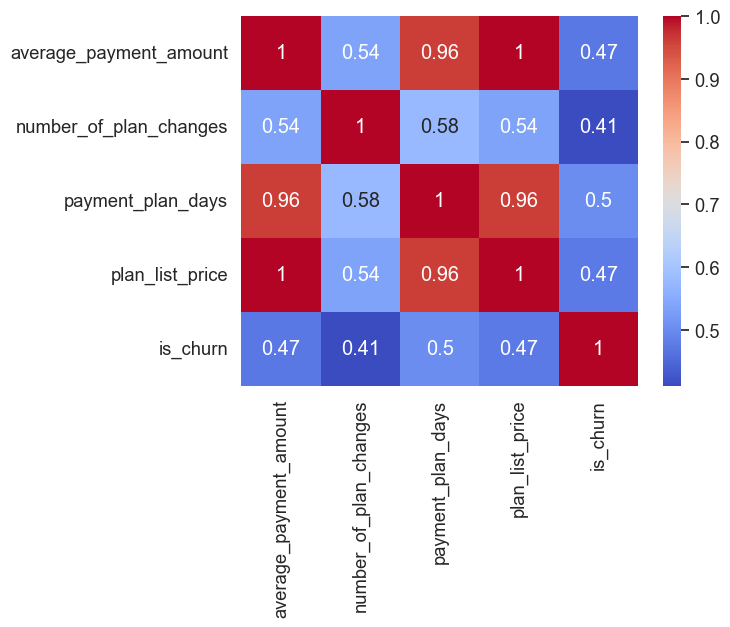

In [102]:
#Analyze Factors Impacting Churn

# Select relevant columns
correlation_data = data[['average_payment_amount', 'number_of_plan_changes', 'payment_plan_days', 'plan_list_price','is_churn']]

# Encode categorical variables (e.g., payment_frequency, payment_method_id) using one-hot encoding or label encoding
correlation_data = pd.get_dummies(correlation_data)
# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [103]:

# Select the relevant columns
X = data[['average_payment_amount', 'number_of_plan_changes', 'plan_list_price','payment_plan_days']]
y = data['is_churn']

# Encode categorical variables (e.g., payment_method, plan_details) using one-hot encoding or label encoding
X = pd.get_dummies(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the balanced data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.97      0.75     16743
           1       0.93      0.39      0.55     16614

    accuracy                           0.68     33357
   macro avg       0.77      0.68      0.65     33357
weighted avg       0.77      0.68      0.65     33357

[[16264   479]
 [10082  6532]]


In [104]:
#Extract feature importance:

# Calculate the coefficients of the logistic regression model
coefficients = log_reg.coef_

# Map the coefficients to the corresponding features
feature_importance = pd.DataFrame(coefficients.T, index=X.columns, columns=['importance'])

# Sort features by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Display the feature importance
print(feature_importance)

                        importance
plan_list_price           3.539697
payment_plan_days         0.940995
number_of_plan_changes    0.287748
average_payment_amount   -2.482106


In [105]:
#Apply the K-means clustering algorithm:
#Prepare the data for K-means clustering:
# Select the relevant columns (e.g., 'actual_amount_paid', 'payment_method_id', 'plan_list_price')
X = data[['average_payment_amount', 'number_of_plan_changes', 'plan_list_price','payment_plan_days']]

# Encode categorical variables (e.g., payment_method, plan_details) using one-hot encoding or label encoding
X = pd.get_dummies(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the K-means clustering model with a specified number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit the model to the data
kmeans.fit(X_scaled)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_


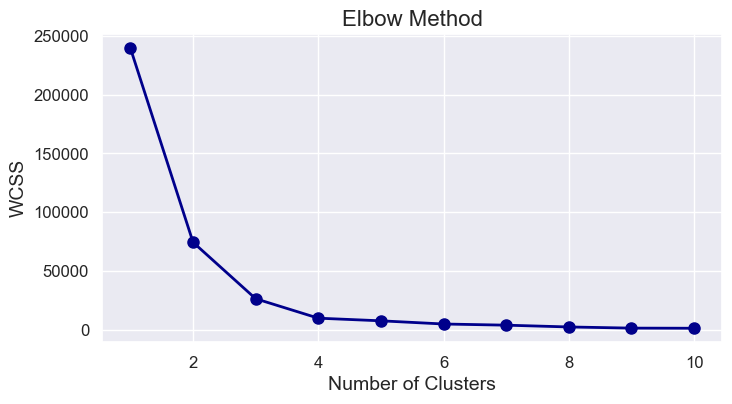

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [106]:
#Optimize the number of clusters:
#Determine the optimal number of clusters using the Elbow Method:

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters (e.g., 1 to 10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', markersize=8, linestyle='-', linewidth=2, color='darkblue')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#based on the below graph, i am choosing k = 3
cluster_labels

In [107]:
# Add the cluster labels to the original DataFrame
data['payment_behavior_segment'] = cluster_labels

# Calculate the churn rate for each payment behavior segment
churn_rate_by_segment = data.groupby('payment_behavior_segment')['is_churn'].mean()

# Analyze user preferences within each payment behavior segment:

# Calculate the average payment amount, payment method distribution, and plan details distribution for each payment behavior segment
segment_preferences = data.groupby('payment_behavior_segment').agg({
    'average_payment_amount': 'mean',
    'number_of_plan_changes': 'mean',
    'payment_plan_days': lambda x: x.value_counts().index[0],
    'payment_method_id': lambda x: x.value_counts().index[0],
    'plan_list_price': lambda x: x.value_counts().index[0]
})


In [108]:
np.unique(cluster_labels)

array([0, 1, 2], dtype=int32)

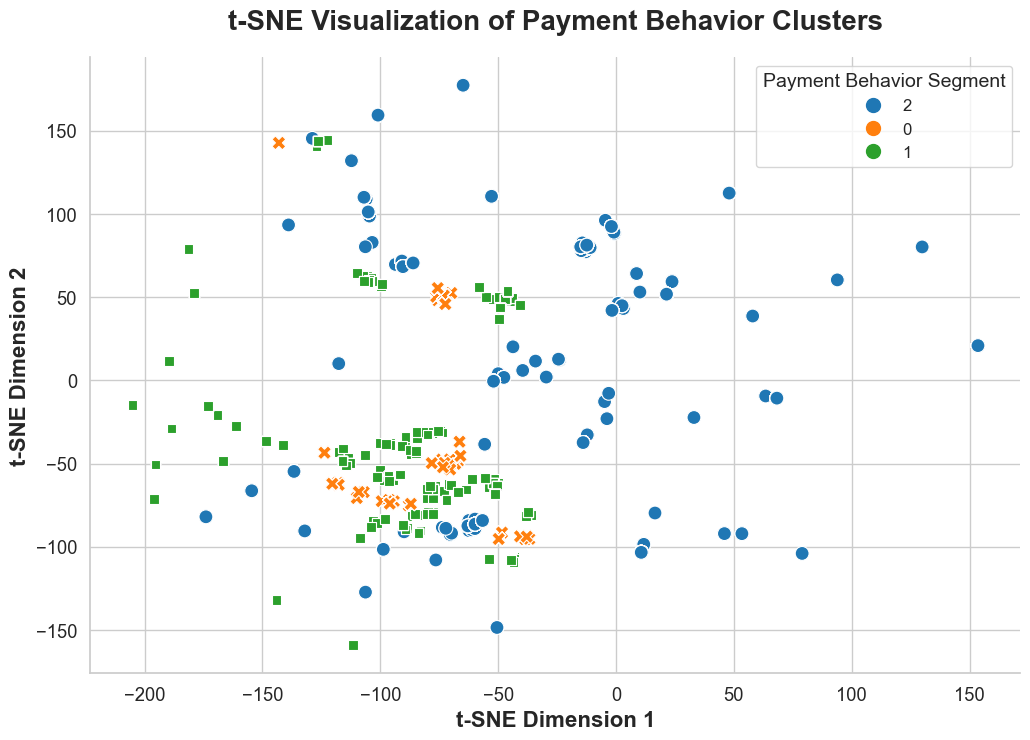

In [109]:
# Select features to use for t-SNE
selected_features = data[['average_payment_amount', 'number_of_plan_changes','payment_plan_days', 'payment_method_id','plan_list_price']]
scaled_features = (selected_features - selected_features.mean()) / selected_features.std()

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
transformed_features = tsne.fit_transform(scaled_features)

# Create a new DataFrame with t-SNE transformed features
tsne_data = data[['payment_behavior_segment']].copy()
tsne_data['tsne_x'] = transformed_features[:, 0]
tsne_data['tsne_y'] = transformed_features[:, 1]

# Set the plot style
sns.set_style('whitegrid')

# Create a custom color palette with distinct colors
colors = sns.color_palette('tab10', n_colors=len(data['payment_behavior_segment'].unique()))

# Plot the t-SNE transformed data with clusters differentiated by color
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=tsne_data, x='tsne_x', y='tsne_y', hue='payment_behavior_segment', palette=colors, style='payment_behavior_segment', s=100)

# Customize the plot's appearance
plt.title('t-SNE Visualization of Payment Behavior Clusters', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('t-SNE Dimension 1', fontsize=16, fontweight='bold')
plt.ylabel('t-SNE Dimension 2', fontsize=16, fontweight='bold')

# Create a custom legend
legend_labels = data['payment_behavior_segment'].unique()
legend_markers = [plt.Line2D([0,0],[0,0], color=colors[i], marker='o', linestyle='', markerfacecolor=colors[i], markersize=10) for i in range(len(legend_labels))]
plt.legend(legend_markers, legend_labels, title='Payment Behavior Segment', title_fontsize=14, fontsize=12)

# Set font scale for tick labels
sns.set(font_scale=1.2)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


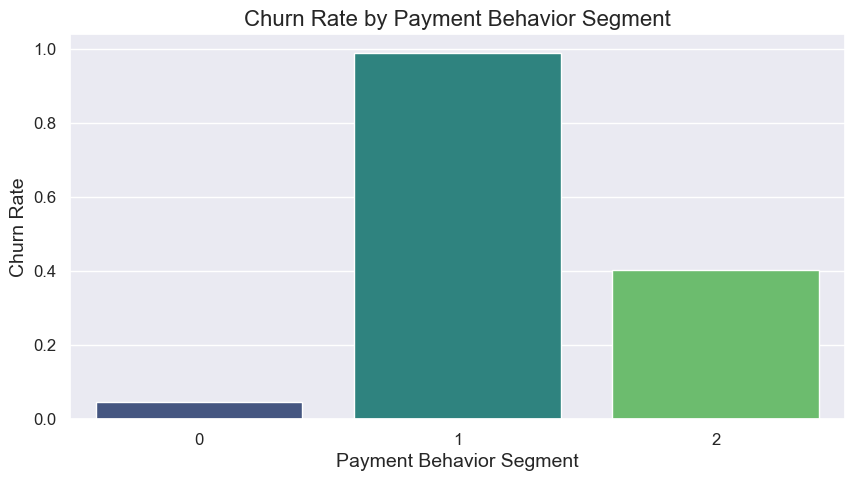

                          average_payment_amount  number_of_plan_changes  \
payment_behavior_segment                                                   
0                                       0.069373                 0.00000   
1                                       0.834909                 0.99661   
2                                       0.142269                 0.99963   

                          payment_plan_days  payment_method_id  \
payment_behavior_segment                                         
0                                        30                 41   
1                                       410                 32   
2                                        30                 41   

                          plan_list_price  
payment_behavior_segment                   
0                                  0.0745  
1                                  0.8940  
2                                  0.0745  


In [110]:
# Plot the churn rate by payment behavior segment
plt.figure(figsize=(10, 5))
sns.barplot(x=churn_rate_by_segment.index, y=churn_rate_by_segment.values, palette='viridis')
plt.title('Churn Rate by Payment Behavior Segment', fontsize=16)
plt.xlabel('Payment Behavior Segment', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Display the user preferences within each payment behavior segment
print(segment_preferences)

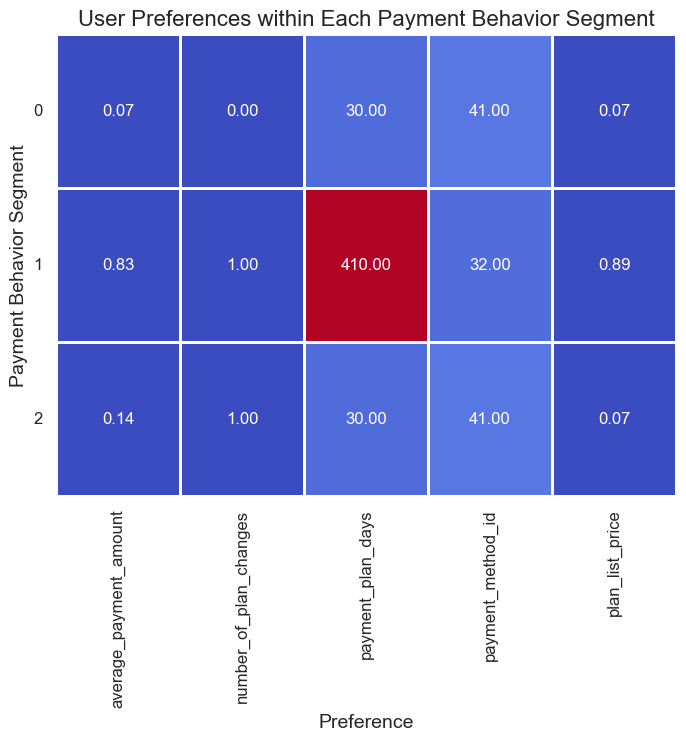

In [111]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(segment_preferences, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='white', cbar=False, annot_kws={"fontsize": 12})
plt.title('User Preferences within Each Payment Behavior Segment', fontsize=16)
plt.xlabel('Preference', fontsize=14)
plt.ylabel('Payment Behavior Segment', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)
plt.show()


In [112]:
#encoding the prices to display the correct ones
df['average_payment_amount'] = df.groupby('msno')['actual_amount_paid'].transform('mean')
#actual_amount_paid
old = df['average_payment_amount'].unique()
old.sort()
new = data['average_payment_amount'].unique()
new.sort()
actual_amount_paid_encode = {}
for i,j in zip(new,old):
    actual_amount_paid_encode[i] = j  
#plan_list_price
old1 = df['plan_list_price'].unique()
old1.sort()
new1 = data['plan_list_price'].unique()
new1.sort()
plan_list_price_encode = {}
for i,j in zip(new1,old1):
    plan_list_price_encode[i] = j
segment_preferences

,average_payment_amount,number_of_plan_changes,payment_plan_days,payment_method_id,plan_list_price
payment_behavior_segment,,,,,
0,0.069373,0.00000,30,41,0.0745
1,0.834909,0.99661,410,32,0.8940
2,0.142269,0.99963,30,41,0.0745


In [113]:
old1

array([   0,   35,   99,  100,  119,  120,  126,  129,  131,  134,  149,
        150,  180,  298,  300,  350,  447,  450,  477,  480,  500,  536,
        600,  799,  894,  930, 1000, 1200, 1299, 1599, 1788, 2000])

In [114]:
segment_preferences['plan_list_price'] = segment_preferences['plan_list_price'].map(plan_list_price_encode)


In [115]:
segment_preferences.drop('average_payment_amount', axis = 1)
segment_preferences['average_payment_amount'] = segment_preferences['plan_list_price']

In [116]:
segment_preferences

,average_payment_amount,number_of_plan_changes,payment_plan_days,payment_method_id,plan_list_price
payment_behavior_segment,,,,,
0,149,0.00000,30,41,149
1,1788,0.99661,410,32,1788
2,149,0.99963,30,41,149


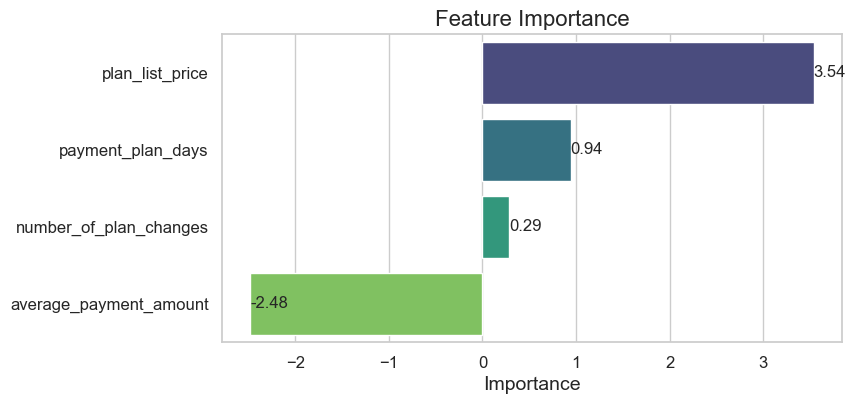

In [117]:
sns.set(style="whitegrid")
#Feature Importance

plt.figure(figsize=(8, 4))
ax = sns.barplot(x='importance', y=feature_importance.index, data=feature_importance, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('')
ax.tick_params(axis='both', labelsize=12)

# Annotate bars with importance values
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, '{:.2f}'.format(width), ha='left', va='center', fontsize=12)

plt.show()


In [118]:
#Best-performing proposed pricing model

best_model = pd.DataFrame({
    'Model': ['Proposed Model 1'],
    'Payment Method': ['Method 1'],
    'Payment Plan Days': [30],
    'Plan List Price': [149],
    'Auto Renew': [True],
    'Churn Rate': [0.023065351830185526],
    'Revenue': [1788]
})

best_model


,Model,Payment Method,Payment Plan Days,Plan List Price,Auto Renew,Churn Rate,Revenue
0,Proposed Model 1,Method 1,30,149,True,0.023065,1788
